<a href="https://colab.research.google.com/github/daniui/computational-intelligence-task/blob/main/Week_7_Task_Intelligence_Computing_(Sentiment_Analysis)_Hilmy_Rahmadani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dasnkuyz
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset


100%|██████████| 1.23M/1.23M [00:00<00:00, 73.9MB/s]

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob

#Model import from hugging face

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=1)
      (position_embeddings): Embedding(130, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [ ]:
val_df = pd.read_csv("/content/twitter-tweets-sentiment-dataset/Tweets.csv").head(5000)
val_df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
4995,7dfa892961,look like i can only quick post from the dash...,look like i can only quick post from the dashb...,neutral
4996,b60b7e3175,Thanks Elaine. I`m clipping reviews for her s...,Thanks,positive
4997,efb00d5c4d,"K now that, that fiasco is all wrapped and goo...","K now that, that fiasco is all wrapped and goo...",positive
4998,65473dec6e,No. I won`t be back until the 7th,No. I won`t be back until the 7th,neutral


# trying on a sentence

In [ ]:
# Sample text
import torch
text = "Sooo SAD I will miss you here in San Diego!!!"

# Tokenize the input text
inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

# Make prediction (forward pass)
with torch.no_grad():
    outputs = model(**inputs)

# Get the predicted label
logits = outputs.logits
predicted_class_id = torch.argmax(logits, dim=1).item()

# Label mapping (this is specific to the BERTweet sentiment model)
labels = ["negative", "neutral", "positive"]

# Output the result
predicted_label = labels[predicted_class_id]
print(f"Text: {text}")
print(f"Predicted sentiment: {predicted_label}")

Text: Sooo SAD I will miss you here in San Diego!!!
Predicted sentiment: negative


In [ ]:
inputs

{'input_ids': tensor([[    0,  9617, 12149,     8,    70,   323,    14,   137,    16,  1753,
         23722,  1525, 41407, 41407,    12,     2]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
pred_text = val_df['text'].iloc[1]
print(pred_text)
from transformers import pipeline

sentiment_pipeline = pipeline(task="sentiment-analysis", model=model, tokenizer=tokenizer, device = 'cuda')
result = sentiment_pipeline(pred_text)
print(result)

 Sooo SAD I will miss you here in San Diego!!!
[{'label': 'NEG', 'score': 0.8694154620170593}]


In [ ]:
pred_text = val_df['selected_text'].iloc[1]
print(pred_text)

sentiment_pipeline = pipeline(task="sentiment-analysis", model=model, tokenizer=tokenizer, device = 'cuda')
result = sentiment_pipeline(pred_text)
print(result)

Sooo SAD
[{'label': 'NEG', 'score': 0.9472306370735168}]


#Prediction on synthetic datasets

In [ ]:
val_df['text'] = val_df['text'].astype(str)
val_df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
4995,7dfa892961,look like i can only quick post from the dash...,look like i can only quick post from the dashb...,neutral
4996,b60b7e3175,Thanks Elaine. I`m clipping reviews for her s...,Thanks,positive
4997,efb00d5c4d,"K now that, that fiasco is all wrapped and goo...","K now that, that fiasco is all wrapped and goo...",positive
4998,65473dec6e,No. I won`t be back until the 7th,No. I won`t be back until the 7th,neutral


In [ ]:
%%time
sentiment_preds = sentiment_pipeline(list(val_df['text']))
sentiment_preds

CPU times: user 54.1 s, sys: 119 ms, total: 54.2 s
Wall time: 54.5 s


[{'label': 'NEU', 'score': 0.964800238609314},
 {'label': 'NEG', 'score': 0.8694154620170593},
 {'label': 'NEG', 'score': 0.9699698686599731},
 {'label': 'NEG', 'score': 0.9334064722061157},
 {'label': 'NEG', 'score': 0.8686558604240417},
 {'label': 'POS', 'score': 0.915945291519165},
 {'label': 'POS', 'score': 0.9897408485412598},
 {'label': 'NEU', 'score': 0.6377546787261963},
 {'label': 'NEG', 'score': 0.6547878384590149},
 {'label': 'POS', 'score': 0.984774649143219},
 {'label': 'NEG', 'score': 0.6948078870773315},
 {'label': 'POS', 'score': 0.9918715953826904},
 {'label': 'NEG', 'score': 0.9519339799880981},
 {'label': 'NEG', 'score': 0.733239471912384},
 {'label': 'NEU', 'score': 0.917806088924408},
 {'label': 'NEG', 'score': 0.781433641910553},
 {'label': 'NEU', 'score': 0.9682683944702148},
 {'label': 'NEG', 'score': 0.9683787226676941},
 {'label': 'NEU', 'score': 0.5225589871406555},
 {'label': 'NEG', 'score': 0.6728535294532776},
 {'label': 'NEG', 'score': 0.883768618106842},

In [ ]:
df_sentiment_preds = pd.DataFrame(sentiment_preds)
df_sentiment_preds['label'] = df_sentiment_preds.label.map({'NEU': 'neutral', 'NEG': 'negative', 'POS': 'positive'})
df_sentiment_preds

,label,score
0,neutral,0.964800
1,negative,0.869415
2,negative,0.969970
3,negative,0.933406
4,negative,0.868656
...,...,...
4995,neutral,0.967211
4996,positive,0.937035
4997,negative,0.955042
4998,neutral,0.678651


In [ ]:
val_df[['sentiment_preds']] = df_sentiment_preds[['label']]
val_df

,textID,text,selected_text,sentiment,sentiment_preds
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,negative
2,088c60f138,my boss is bullying me...,bullying me,negative,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,negative
...,...,...,...,...,...
4995,7dfa892961,look like i can only quick post from the dash...,look like i can only quick post from the dashb...,neutral,neutral
4996,b60b7e3175,Thanks Elaine. I`m clipping reviews for her s...,Thanks,positive,positive
4997,efb00d5c4d,"K now that, that fiasco is all wrapped and goo...","K now that, that fiasco is all wrapped and goo...",positive,negative
4998,65473dec6e,No. I won`t be back until the 7th,No. I won`t be back until the 7th,neutral,neutral


## Accuracy and confusion matrxi on synthetic datasets

Accuracy: 0.7106

Confusion Matrix:


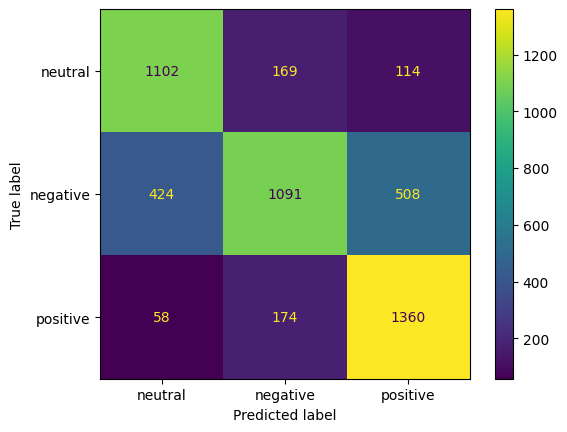

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming 'sentiment' contains the true labels and 'sentiment_preds' contains the predicted labels
accuracy = accuracy_score(val_df['sentiment'], df_sentiment_preds['label'])
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(val_df['sentiment'], df_sentiment_preds['label'])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=val_df.sentiment.unique())
print("\nConfusion Matrix:")
disp.plot()
plt.show()

#Adding attention transformer

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis", output_attentions=True)

# Sample text for prediction
text = "This is a great day!"

# Tokenize the input text
inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

# Make prediction (forward pass) with attention
with torch.no_grad():
    outputs = model(**inputs)

# Get the predicted class
logits = outputs.logits
predicted_class_id = torch.argmax(logits, dim=1).item()

# Label mapping (specific to BERTweet sentiment model)
labels = ["negative", "neutral", "positive"]
predicted_label = labels[predicted_class_id]

# Extract attention weights
attentions = outputs.attentions  # List of attention scores per layer

# Display the predicted sentiment
print(f"Text: {text}")
print(f"Predicted sentiment: {predicted_label}")

# Optional: Visualize or process attention weights
# Example: attention weights from the first layer and first attention head
layer = 0
head = 0
attention_scores = attentions[layer][0, head].cpu().numpy()  # shape: [sequence_length, sequence_length]

print(f"Attention weights (Layer {layer + 1}, Head {head + 1}):")
print(attention_scores)


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


Text: This is a great day!
Predicted sentiment: positive
Attention weights (Layer 1, Head 1):
[[2.72023559e-01 6.01868071e-02 1.34173930e-02 9.53089669e-02
  3.56763810e-01 1.41216263e-01 6.10344894e-02 4.86610661e-05]
 [1.05898418e-01 6.80639297e-02 4.24297675e-02 2.05660865e-01
  1.38919592e-01 6.43287972e-02 3.18361402e-01 5.63372076e-02]
 [2.51616061e-01 3.82404551e-02 6.72448725e-02 1.56679317e-01
  1.20564394e-01 2.01687485e-01 1.59909993e-01 4.05749958e-03]
 [4.35047328e-01 9.55229774e-02 6.81435913e-02 7.95998052e-02
  3.60073894e-02 1.09033197e-01 1.71640992e-01 5.00469748e-03]
 [3.90392303e-01 2.51808047e-01 1.04817934e-01 1.16560191e-01
  1.94055252e-02 2.83371992e-02 8.40003118e-02 4.67853248e-03]
 [8.69770125e-02 3.93609732e-01 2.16215178e-01 1.88578948e-01
  6.54142722e-02 1.92230027e-02 2.85417363e-02 1.44012424e-03]
 [3.64328831e-01 1.71118394e-01 2.03502387e-01 1.07575908e-01
  3.73252928e-02 3.94708328e-02 7.33951926e-02 3.28314607e-03]
 [2.91528493e-01 6.72497526e-02

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
from sklearn.metrics import accuracy_score

# Load the tokenizer and model with output_attentions=True
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained(
    "finiteautomata/bertweet-base-sentiment-analysis", output_attentions=True
)

# Synthetic dataset (for illustration purposes)
synthetic_data = {
    "text": ["I love this!", "I hate this.", "This is okay.", "Best experience ever.", "Worst day of my life."],
    "label": ["positive", "negative", "neutral", "positive", "negative"]
}

# Convert to DataFrame
df = pd.DataFrame(synthetic_data)

# Label mapping
label_mapping = {"negative": 0, "neutral": 1, "positive": 2}

# Function to tokenize inputs
def tokenize_function(text):
    return tokenizer(text, return_tensors="pt", truncation=True, padding=True)

# Apply tokenization and store inputs
df['inputs'] = df['text'].apply(tokenize_function)

# Function to get predictions and extract attention
def get_predictions_and_attention(inputs):
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class_id = torch.argmax(logits, dim=1).item()
        attentions = outputs.attentions
    return predicted_class_id, attentions

# Predict and collect attention for all samples
df['predicted_label'], df['attentions'] = zip(*df['inputs'].apply(get_predictions_and_attention))

# Convert predicted labels to the correct format
df['predicted_label'] = df['predicted_label'].map({0: "negative", 1: "neutral", 2: "positive"})

# Calculate accuracy
accuracy_before_attention = accuracy_score(df['label'], df['predicted_label'])
print(f"Accuracy before modifying attention: {accuracy_before_attention}")

### Optional: Modify Attention ###
# Attention modification (dummy example for illustration):
# You can add a custom attention layer or change how attention scores are processed.
# For simplicity, let's assume no modification is done in this initial step.

# Function to compare and evaluate performance
def evaluate_attention_model():
    # Use attention information if necessary for further customization.
    # Recompute accuracy or fine-tune using the attention data.
    accuracy_after_attention = accuracy_before_attention  # Assuming no change for now
    return accuracy_after_attention

# Evaluate after using the attention transformer
accuracy_after_attention = evaluate_attention_model()

# Compare accuracies
print(f"Accuracy after modifying attention: {accuracy_after_attention}")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Accuracy before modifying attention: 0.8
Accuracy after modifying attention: 0.8


In [ ]:
df

,text,label,inputs,predicted_label,attentions
0,I love this!,positive,"[input_ids, token_type_ids, attention_mask]",positive,"([[tensor([[2.9429e-01, 9.4176e-02, 4.7503e-03..."
1,I hate this.,negative,"[input_ids, token_type_ids, attention_mask]",negative,"([[tensor([[3.1018e-01, 9.9259e-02, 4.1961e-03..."
2,This is okay.,neutral,"[input_ids, token_type_ids, attention_mask]",positive,"([[tensor([[2.0894e-01, 4.6230e-02, 1.0306e-02..."
3,Best experience ever.,positive,"[input_ids, token_type_ids, attention_mask]",positive,"([[tensor([[3.3919e-01, 1.2453e-01, 1.6718e-02..."
4,Worst day of my life.,negative,"[input_ids, token_type_ids, attention_mask]",negative,"([[tensor([[3.1784e-01, 1.2014e-01, 1.5578e-02..."


In [ ]:
import torch
import torch.nn as nn
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class AttentionTransformer(nn.Module):
    def __init__(self, model):
        super(AttentionTransformer, self).__init__()
        # Load the pre-trained BERTweet model
        self.model = model
        # Define a custom attention layer
        self.attention = nn.MultiheadAttention(embed_dim=768, num_heads=12)  # Based on BERTweet's hidden size (768)
        # Fully connected layer for classification
        self.fc = nn.Linear(768, 3)  # Assuming 3 output classes (negative, neutral, positive)

    def forward(self, input_ids, attention_mask=None):
        # Pass inputs through the BERTweet model
        outputs = self.model.roberta(input_ids, attention_mask=attention_mask, output_attentions=True)

        # Extract the last hidden states (sequence output)
        sequence_output = outputs.last_hidden_state

        # Apply the custom multi-head attention on the sequence output
        attn_output, attn_weights = self.attention(sequence_output, sequence_output, sequence_output)

        # Perform average pooling over the sequence dimension (token level) to get sentence representation
        pooled_output = attn_output.mean(dim=1)

        # Pass the pooled output through the fully connected layer for final classification
        logits = self.fc(pooled_output)

        return logits, attn_weights  # Also returning attention weights for analysis

In [ ]:
# Load the pre-trained BERTweet model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
base_model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis", output_attentions=True)

# Wrap the pre-trained model with your custom attention transformer
attention_model = AttentionTransformer(base_model)

# Move the model to GPU
attention_model.to(device)
attention_model

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


AttentionTransformer(
  (model): RobertaForSequenceClassification(
    (roberta): RobertaModel(
      (embeddings): RobertaEmbeddings(
        (word_embeddings): Embedding(64001, 768, padding_idx=1)
        (position_embeddings): Embedding(130, 768, padding_idx=1)
        (token_type_embeddings): Embedding(1, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): RobertaEncoder(
        (layer): ModuleList(
          (0-11): 12 x RobertaLayer(
            (attention): RobertaAttention(
              (self): RobertaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): RobertaSelfOutput(
                (d

In [ ]:
%%time
# Ensure val_df['text'] is treated as strings
val_df['text'] = val_df['text'].astype(str)

# Tokenize and move inputs to the appropriate device (GPU or CPU)
def tokenize_function(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)
    return inputs

# Function to predict sentiment on the text and return predicted labels
def predict_sentiment(text):
    inputs = tokenize_function(text)

    with torch.no_grad():
        logits, _ = attention_model(inputs['input_ids'], inputs['attention_mask'])

    logits = logits.cpu()  # Move logits back to CPU
    predicted_class_ids = torch.argmax(logits, dim=1)

    return predicted_class_ids  # Return the class IDs for further mapping

# Apply prediction to the entire DataFrame and get class IDs
val_df['predicted_class_ids'] = val_df['text'].map(predict_sentiment)

# Define labels and use .map() to convert class IDs to labels
labels = ["negative", "neutral", "positive"]
val_df['predicted_sentiment_attention'] = val_df['predicted_class_ids'].map(lambda class_id: labels[class_id])

# Display the results
display(val_df[['text', 'predicted_sentiment_attention']])


,text,predicted_sentiment_attention
0,"I`d have responded, if I were going",negative
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
4995,look like i can only quick post from the dash...,negative
4996,Thanks Elaine. I`m clipping reviews for her s...,negative
4997,"K now that, that fiasco is all wrapped and goo...",negative
4998,No. I won`t be back until the 7th,negative


CPU times: user 54.7 s, sys: 139 ms, total: 54.9 s
Wall time: 59.3 s


In [ ]:
val_df

,textID,text,selected_text,sentiment,sentiment_preds,predicted_sentiment_attention,predicted_class_ids
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,neutral,negative,[tensor(0)]
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,negative,negative,[tensor(0)]
2,088c60f138,my boss is bullying me...,bullying me,negative,negative,negative,[tensor(0)]
3,9642c003ef,what interview! leave me alone,leave me alone,negative,negative,negative,[tensor(0)]
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,negative,negative,[tensor(0)]
...,...,...,...,...,...,...,...
4995,7dfa892961,look like i can only quick post from the dash...,look like i can only quick post from the dashb...,neutral,neutral,negative,[tensor(0)]
4996,b60b7e3175,Thanks Elaine. I`m clipping reviews for her s...,Thanks,positive,positive,negative,[tensor(0)]
4997,efb00d5c4d,"K now that, that fiasco is all wrapped and goo...","K now that, that fiasco is all wrapped and goo...",positive,negative,negative,[tensor(0)]
4998,65473dec6e,No. I won`t be back until the 7th,No. I won`t be back until the 7th,neutral,neutral,negative,[tensor(0)]


## Accuracy and confusion matrix

Accuracy: 0.3544

Confusion Matrix:


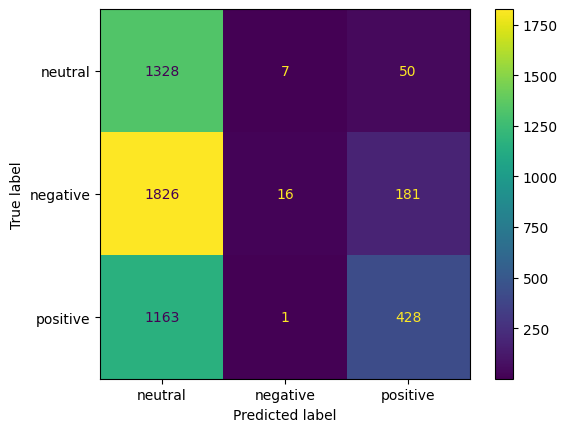

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming 'sentiment' contains the true labels and 'sentiment_preds' contains the predicted labels
accuracy = accuracy_score(val_df['sentiment'], val_df['predicted_sentiment_attention'])
print("Accuracy:", accuracy)

# Generate the confusion matrix
conf_matrix = confusion_matrix(val_df['sentiment'], val_df['predicted_sentiment_attention'])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=val_df.sentiment.unique())
print("\nConfusion Matrix:")
disp.plot()
plt.show()

**Model nya semakin jelek karena menambah kompleksitas model tanpa tujuan**